
## Data Sources
- WFP Market Food Prices for Ghana
- geoBoundaries Ghana ADM1 and ADM2 administrative units


# Region-level GeoAI analysis for Local Rice Prices

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns for debugging visibility
pd.set_option("display.max_columns", None)

food_path = "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/wfp_food_prices_gha.csv"
market_path = "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/wfp_markets_gha.csv"

# Load raw datasets
food_prices = pd.read_csv(food_path, parse_dates=["date"], skiprows=[1])
markets = pd.read_csv(market_path, skiprows=[1])

print("Food prices rows:", len(food_prices))
print("Market metadata rows:", len(markets))

# Inspect first few rows of food prices
food_prices.head()

Food prices rows: 26666
Market metadata rows: 93


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Maize,51,100 KG,actual,Wholesale,GHS,25.40,27.61
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
2,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Sorghum,65,109 KG,actual,Wholesale,GHS,38.25,41.58
3,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Yam,99,250 KG,actual,Wholesale,GHS,63.38,68.89
4,2006-01-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Maize,51,100 KG,actual,Wholesale,GHS,16.15,17.55


In [2]:
markets.head()

,market_id,market,countryiso3,admin1,admin2,latitude,longitude
0,209,Accra,GHA,GREATER ACCRA,ACCRA METROPOLIS,5.55,-0.22
1,210,Tema,GHA,GREATER ACCRA,TEMA METROPOLIS,5.62,-0.02
2,211,Sekondi/Takoradi,GHA,WESTERN,SEKONDI TAKORADI,4.93,-1.70
3,212,Koforidua,GHA,EASTERN,NEW JUABEN MUNICIPAL,6.08,-0.25
4,213,Cape Coast,GHA,CENTRAL,CAPE COAST METRO,5.11,-1.24


In [3]:
# Normalize casing for consistency
food_prices['commodity'] = food_prices['commodity'].str.strip()

# Filter for Rice (local)
rice_df = food_prices[food_prices['commodity'].str.lower() == "rice (local)"].copy()

print("Filtered rows:", len(rice_df))
rice_df.head()


Filtered rows: 2166


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65


In [40]:
# Filter for all rice-related commodities
rice_df = food_prices[food_prices["commodity"].str.lower().str.contains("rice")].copy()

# Clean numeric fields
rice_df['price'] = pd.to_numeric(rice_df['price'], errors='coerce')
rice_df['latitude'] = pd.to_numeric(rice_df['latitude'], errors='coerce')
rice_df['longitude'] = pd.to_numeric(rice_df['longitude'], errors='coerce')

# Drop rows lacking coordinates or price
rice_df = rice_df.dropna(subset=['latitude', 'longitude', 'price'])

print("Number of rice observations:", len(rice_df))
rice_df.head()


Number of rice observations: 4183


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65


In [41]:
rice_df.commodity.unique()

array(['Rice (local)', 'Rice (imported)', 'Rice (paddy)'], dtype=object)

In [42]:
rice_df.price.describe(), rice_df.price.isnull().sum()

(count    4183.000000
 mean      131.850782
 std       130.818786
 min         2.240000
 25%        30.350000
 50%        85.000000
 75%       205.000000
 max       912.630000
 Name: price, dtype: float64,
 np.int64(0))

In [43]:
rice_df.date.isnull().sum()

np.int64(0)

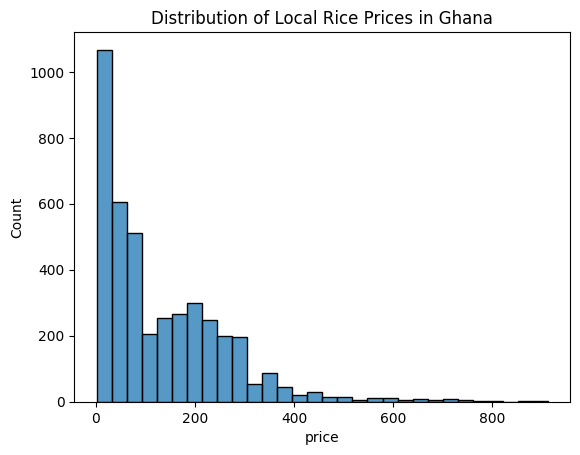

In [44]:
sns.histplot(rice_df.price.dropna(), bins=30);
plt.title("Distribution of Local Rice Prices in Ghana");

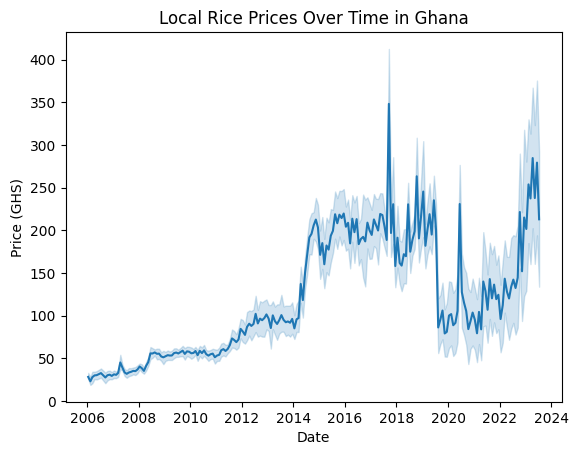

In [45]:
sns.lineplot(data=rice_df, x="date", y="price");
plt.title("Local Rice Prices Over Time in Ghana");
plt.xlabel("Date");
plt.ylabel("Price (GHS)");

In [46]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 1 to 26648
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          4183 non-null   datetime64[ns]
 1   admin1        4183 non-null   object        
 2   admin2        4183 non-null   object        
 3   market        4183 non-null   object        
 4   market_id     4183 non-null   int64         
 5   latitude      4183 non-null   float64       
 6   longitude     4183 non-null   float64       
 7   category      4183 non-null   object        
 8   commodity     4183 non-null   object        
 9   commodity_id  4183 non-null   int64         
 10  unit          4183 non-null   object        
 11  priceflag     4183 non-null   object        
 12  pricetype     4183 non-null   object        
 13  currency      4183 non-null   object        
 14  price         4183 non-null   float64       
 15  usdprice      4183 non-null   float64     

In [47]:
# Ensure numeric values for coordinates and price
rice_df['price'] = pd.to_numeric(rice_df['price'], errors='coerce')
rice_df['latitude'] = pd.to_numeric(rice_df['latitude'], errors='coerce')
rice_df['longitude'] = pd.to_numeric(rice_df['longitude'], errors='coerce')

# Drop rows without valid locations or prices
rice_df = rice_df.dropna(subset=['latitude', 'longitude', 'price'])

print("Remaining rows after cleaning:", len(rice_df))
rice_df.head()


Remaining rows after cleaning: 4183


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65


In [48]:
from shapely.geometry import Point

# Convert DataFrame to GeoDataFrame
rice_gdf = gpd.GeoDataFrame(
    rice_df,
    geometry=gpd.points_from_xy(rice_df.longitude, rice_df.latitude),
    crs="EPSG:4326"  # WGS84 latitude/longitude
)

rice_gdf.head()


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,geometry
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93,POINT (-1.62 6.68)
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26,POINT (-0.22 5.55)
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34,POINT (-2.48 10.05)
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33,POINT (-1.93 7.58)
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65,POINT (-0.83 9.4)


In [49]:
%pip install fiona

Note: you may need to restart the kernel to use updated packages.


In [50]:
gpd.options.io_engine = "fiona"  # ensure stable reading

geojson_path = "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/geoBoundaries-GHA-ADM1_simplified.geojson"

regions = gpd.read_file(geojson_path)

# Check projection and columns
regions.crs, regions.head()


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
               shapeName shapeISO                  shapeID shapeGroup  \
 0  Western North Region    GH-WN  69750345B35244651716901        GHA   
 1          Ahafo Region    GH-AF  69750345B39836988306125        GHA   
 2      Bono East Region    GH-BE  69750345B43572680159989        GHA   
 3       Savannah Region    GH-SV  69750345B26994269439887        GHA   
 4     North East Region    GH-NE  69750345B94584643914501        GHA   
 
   shapeType                                           geometry  
 0      ADM1  POLYGON ((-2.57218 5.74991, -2.56119 5.79226, ...  
 1      ADM1  POLYGON ((-2.42467 6.38815, -2.42346 6.39658, ...  
 2      ADM1  POLYGON ((-0.13624 7.82498,

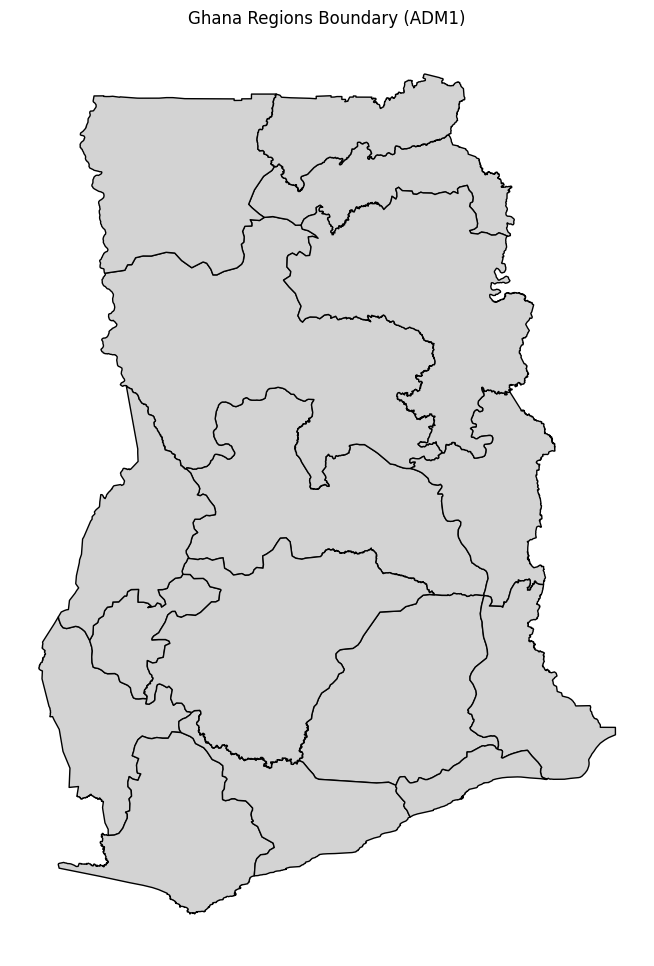

In [51]:
fig, ax = plt.subplots(figsize=(12, 12))
regions.plot(ax=ax, color="lightgray", edgecolor="black")
ax.set_title("Ghana Regions Boundary (ADM1)")
ax.set_axis_off()


In [52]:
# Ensure both are in the same CRS
rice_gdf = rice_gdf.to_crs("EPSG:4326")
regions = regions.to_crs("EPSG:4326")

# Spatial join: assign each rice observation to a region
rice_with_regions = gpd.sjoin(
    rice_gdf,
    regions[["shapeName", "geometry"]],  # We keep only needed columns
    how="inner",
    predicate="within"
)

print("Rows after spatial join:", len(rice_with_regions))
rice_with_regions.head()


Rows after spatial join: 3960


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,geometry,index_right,shapeName
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93,POINT (-1.62 6.68),10,Ashanti Region
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26,POINT (-0.22 5.55),15,Greater Accra Region
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34,POINT (-2.48 10.05),13,Upper West Region
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33,POINT (-1.93 7.58),2,Bono East Region
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65,POINT (-0.83 9.4),8,Northern Region


In [53]:
rice_region_stats = (
    rice_with_regions
    .groupby("shapeName")["price"]
    .median()
    .reset_index()
    .rename(columns={"shapeName": "region", "price": "median_price"})
)

rice_region_stats


,region,median_price
0,Ashanti Region,80.620
1,Bono East Region,85.000
2,Bono Region,140.000
3,Central Region,85.000
4,Eastern Region,105.000
5,Greater Accra Region,156.500
6,North East Region,262.500
7,Northern Region,80.000
8,Oti Region,221.000
9,Upper East Region,71.500


In [54]:
regions_stats = regions.merge(
    rice_region_stats,
    left_on="shapeName",
    right_on="region",
    how="left"
)

regions_stats.head()


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,region,median_price
0,Western North Region,GH-WN,69750345B35244651716901,GHA,ADM1,"POLYGON ((-2.57218 5.74991, -2.56119 5.79226, ...",NaN,NaN
1,Ahafo Region,GH-AF,69750345B39836988306125,GHA,ADM1,"POLYGON ((-2.42467 6.38815, -2.42346 6.39658, ...",NaN,NaN
2,Bono East Region,GH-BE,69750345B43572680159989,GHA,ADM1,"POLYGON ((-0.13624 7.82498, -0.14542 7.9031, -...",Bono East Region,85.0
3,Savannah Region,GH-SV,69750345B26994269439887,GHA,ADM1,"POLYGON ((-0.38471 8.15282, -0.36534 8.16333, ...",NaN,NaN
4,North East Region,GH-NE,69750345B94584643914501,GHA,ADM1,"POLYGON ((-1.23184 10.01754, -1.20987 10.06216...",North East Region,262.5


In [55]:
regions_stats.values

array([['Western North Region', 'GH-WN', '69750345B35244651716901',
        'GHA', 'ADM1',
        <POLYGON ((-2.572 5.75, -2.561 5.792, -2.534 5.773, -2.494 5.764, -2.486 5.7...>,
        nan, nan],
       ['Ahafo Region', 'GH-AF', '69750345B39836988306125', 'GHA',
        'ADM1',
        <POLYGON ((-2.425 6.388, -2.423 6.397, -2.425 6.405, -2.422 6.407, -2.429 6....>,
        nan, nan],
       ['Bono East Region', 'GH-BE', '69750345B43572680159989', 'GHA',
        'ADM1',
        <POLYGON ((-0.136 7.825, -0.145 7.903, -0.142 7.935, -0.137 7.94, -0.135 7.9...>,
        'Bono East Region', 85.0],
       ['Savannah Region', 'GH-SV', '69750345B26994269439887', 'GHA',
        'ADM1',
        <POLYGON ((-0.385 8.153, -0.365 8.163, -0.354 8.166, -0.352 8.173, -0.356 8....>,
        nan, nan],
       ['North East Region', 'GH-NE', '69750345B94584643914501', 'GHA',
        'ADM1',
        <POLYGON ((-1.232 10.018, -1.21 10.062, -1.173 10.088, -1.126 10.1, -1.112 1...>,
        'North East Reg

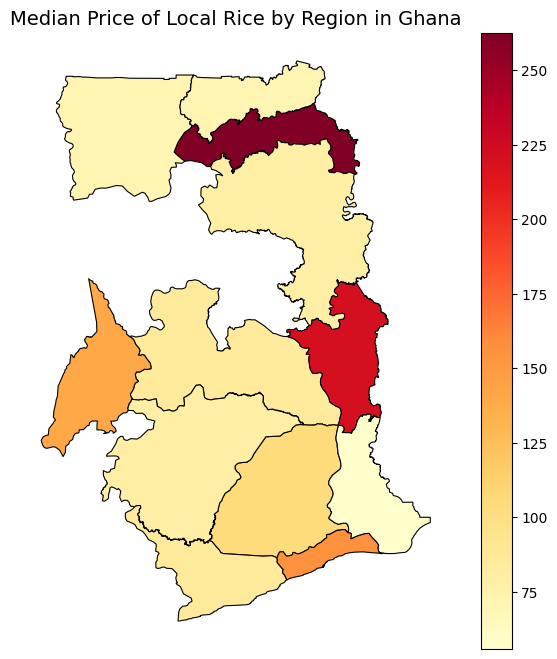

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))
regions_stats.plot(
    column="median_price",
    cmap="YlOrRd",
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True,
)
ax.set_title("Median Price of Local Rice by Region in Ghana", fontsize=14)
ax.set_axis_off()
plt.show()


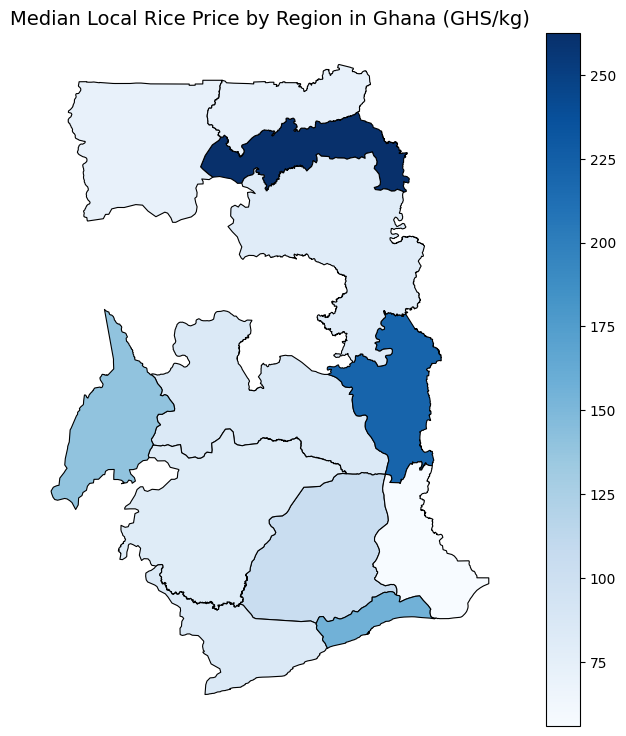

In [57]:
fig, ax = plt.subplots(figsize=(9, 9))
regions_stats.plot(
    column="median_price",
    cmap="Blues",  # professional neutral palette
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Median Local Rice Price by Region in Ghana (GHS/kg)", fontsize=14)
ax.set_axis_off()
plt.show()


In [58]:
# Drop rows with missing values for ranking
ranked = regions_stats.dropna(subset=["median_price"])[["shapeName", "median_price"]]

cheapest = ranked.nsmallest(5, "median_price")
most_expensive = ranked.nlargest(5, "median_price")

print("Cheapest regions:")
display(cheapest)

print("\nMost expensive regions:")
display(most_expensive)


Cheapest regions:


,shapeName,median_price
12,Volta Region,55.815
13,Upper West Region,71.325
14,Upper East Region,71.500
8,Northern Region,80.000
10,Ashanti Region,80.620



Most expensive regions:


,shapeName,median_price
4,North East Region,262.5
5,Oti Region,221.0
15,Greater Accra Region,156.5
11,Bono Region,140.0
7,Eastern Region,105.0


In [59]:
regions_stats.to_file("/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/processed/regions_with_rice_prices.geojson", driver="GeoJSON")
print("Saved to /home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/processed/regions_with_rice_prices.geojson")


Saved to /home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/processed/regions_with_rice_prices.geojson


# District-level GeoAI analysis for Local Rice Prices

In [60]:
gpd.options.io_engine = "fiona"  # stable reading

districts = gpd.read_file(
    "/home/chantelle/Desktop/PersonalProjects/GAIN_workshop/gain_geoai_workshop/data/raw/geoBoundaries-GHA-ADM2-all.zip"
)

print("Districts loaded:", len(districts))
districts.head()


Districts loaded: 260


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Adenta Municipal,None,2480657B26321648161032,GHA,ADM2,"POLYGON ((-0.0974 5.68393, -0.09659 5.68348, -..."
1,Ledzokuku Municipal,None,2480657B94892111901595,GHA,ADM2,"POLYGON ((-0.14043 5.63554, -0.12785 5.6408, -..."
2,Chereponi,None,2480657B14989848452061,GHA,ADM2,"POLYGON ((0.07166 9.96635, 0.07162 9.96649, 0...."
3,Wa East,None,2480657B52594370214383,GHA,ADM2,"POLYGON ((-1.66356 10.17369, -1.66206 10.17161..."
4,Wa Municipal,None,2480657B26357719954092,GHA,ADM2,"POLYGON ((-2.40423 10.16275, -2.40413 10.16247..."


In [61]:
rice_with_districts = gpd.sjoin(
    rice_gdf,
    districts[["shapeName", "geometry"]],
    how="inner",
    predicate="within"
)

rice_with_districts.head()


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,geometry,index_right,shapeName
1,2006-01-15,ASHANTI,KMA,Kumasi,215,6.68,-1.62,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,33.06,35.93,POINT (-1.62 6.68),205,Kumasi Metropolitan
9,2006-01-15,GREATER ACCRA,ACCRA METROPOLIS,Accra,209,5.55,-0.22,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.00,28.26,POINT (-0.22 5.55),224,Accra Metropolis
18,2006-01-15,UPPER WEST,WA MUNICIPAL,Wa,222,10.05,-2.48,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,26.07,28.34,POINT (-2.48 10.05),4,Wa Municipal
27,2006-02-15,BRONG AHAFO,TECHIMAN MUNICIPAL,Techiman,218,7.58,-1.93,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,22.38,24.33,POINT (-1.93 7.58),154,Techiman Municipal
34,2006-02-15,NORTHERN,TAMALE NORTH SUB METRO,Tamale,220,9.40,-0.83,cereals and tubers,Rice (local),71,50 KG,actual,Wholesale,GHS,19.00,20.65,POINT (-0.83 9.4),185,Tamale Metropolitan


In [62]:
district_counts = rice_with_districts.groupby("shapeName")["price"].count()
valid_districts = district_counts[district_counts >= 0].index

rice_district_stats = (
    rice_with_districts[rice_with_districts["shapeName"].isin(valid_districts)]
    .groupby("shapeName")["price"]
    .median()
    .reset_index()
    .rename(columns={"shapeName": "district", "price": "median_price"})
)

rice_district_stats.head(), rice_district_stats.shape


(               district  median_price
 0      Accra Metropolis       110.250
 1       Bawku Municipal       165.000
 2  Bolgatanga Municipal        71.375
 3                 Bongo       220.000
 4          Builsa South       236.000,
 (37, 2))

In [63]:
districts_stats = districts.merge(
    rice_district_stats,
    left_on="shapeName",
    right_on="district",
    how="left"
)

districts_stats.head()


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,district,median_price
0,Adenta Municipal,None,2480657B26321648161032,GHA,ADM2,"POLYGON ((-0.0974 5.68393, -0.09659 5.68348, -...",NaN,NaN
1,Ledzokuku Municipal,None,2480657B94892111901595,GHA,ADM2,"POLYGON ((-0.14043 5.63554, -0.12785 5.6408, -...",NaN,NaN
2,Chereponi,None,2480657B14989848452061,GHA,ADM2,"POLYGON ((0.07166 9.96635, 0.07162 9.96649, 0....",NaN,NaN
3,Wa East,None,2480657B52594370214383,GHA,ADM2,"POLYGON ((-1.66356 10.17369, -1.66206 10.17161...",NaN,NaN
4,Wa Municipal,None,2480657B26357719954092,GHA,ADM2,"POLYGON ((-2.40423 10.16275, -2.40413 10.16247...",Wa Municipal,69.0


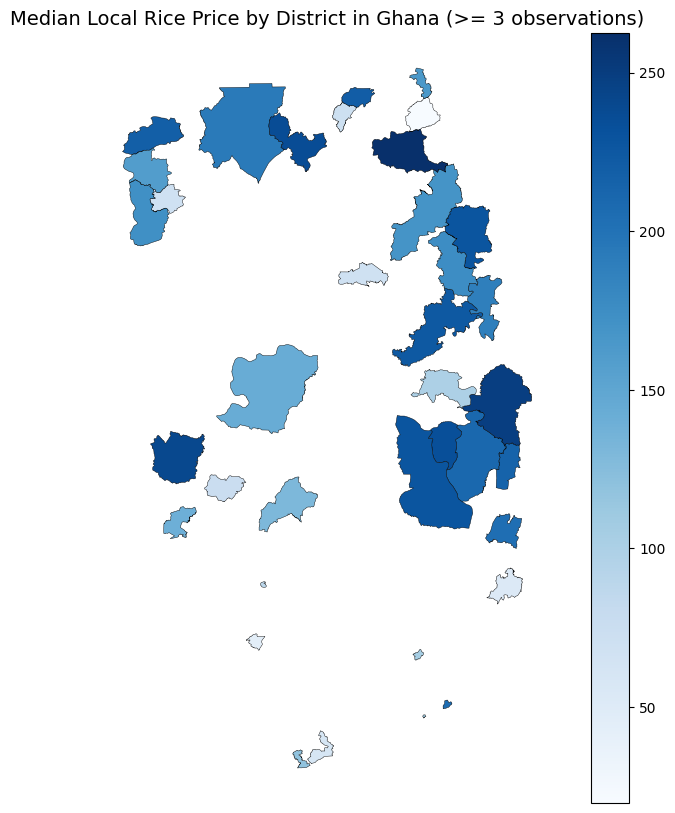

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
districts_stats.plot(
    column="median_price",
    cmap="Blues",
    linewidth=0.3,
    edgecolor="black",
    legend=True,
    ax=ax,
)

ax.set_title("Median Local Rice Price by District in Ghana (>= 3 observations)", fontsize=14)
ax.set_axis_off()
plt.show()


In [65]:
print("Unique markets in rice data:", rice_df['market'].nunique())
print("Unique districts in boundary file:", districts['shapeName'].nunique())


Unique markets in rice data: 39
Unique districts in boundary file: 260


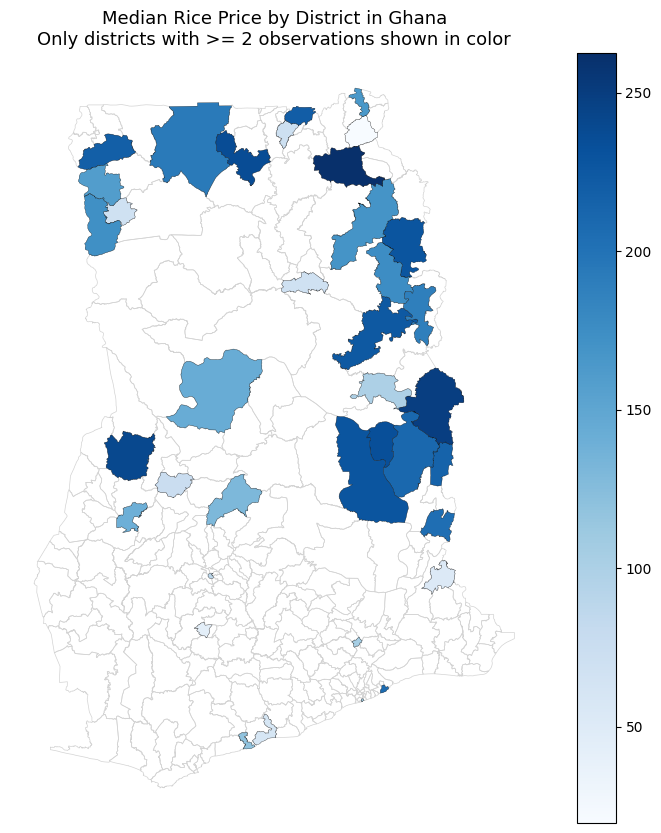

In [66]:
# Separate districts with and without rice data
districts_with_data = districts_stats.dropna(subset=["median_price"])
districts_without_data = districts_stats[districts_stats["median_price"].isna()]

fig, ax = plt.subplots(figsize=(10, 10))

# Plot missing districts as boundary outlines only
districts_without_data.plot(
    ax=ax,
    facecolor="none",
    edgecolor="lightgray",
    linewidth=0.5,
)

# Plot districts with valid data as filled choropleth
districts_with_data.plot(
    column="median_price",
    cmap="Blues",
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax,
)

ax.set_title("Median Rice Price by District in Ghana\nOnly districts with >= 2 observations shown in color", fontsize=13)
ax.set_axis_off()

plt.show()

